In [2]:
import pandas
import numpy as np
data = pandas.read_csv("TDOA与PDOA集中上传.csv")
resu = []
rolling = None
resu2 = []
for _,i in data.iterrows():
    if rolling != i['rolling']:
        if len(resu2)>0:
            resu2 = pandas.DataFrame(resu2)
            resu.append(resu2)
        rolling = i['rolling']
        resu2 = []
    resu2.append(i)
del resu2 
del rolling 
del i 
del data

In [1]:
import pandas as pd

# 构建演示数据
df = pd.DataFrame({"cat": ["b", "b", "a", "a"], "value": [1, 3, 2, 4]})
# df['cat'] = df['cat'].astype('category')

# 用cat列构建分组，保持分组名排序开启，
grouped = df.groupby(by="cat")
grouped = grouped

  cat  value
2   a      2
3   a      4
  cat  value
0   b      1
1   b      3
  cat  value
2   a      2
3   a      4
  cat  value
0   b      1
1   b      3


In [1]:
Anchors = [0x0AFC,0x5B2B,0x08D3,0x7BD3] # 从目前收到的anchor里选择.需要保证顺序可控
tag = 0x45AF # 下拉框选择
filtwindow = 10 # 拖动条 1~100
TDOALimit = 1 # 参数文件中设置 最大TDOA值
print(Anchors,tag)

[2812, 23339, 2259, 31699] 17839


In [2]:
import xorbits.pandas as xpd
import numpy as np
data = xpd.read_csv("TDOA与PDOA集中上传.csv")
def func(i):
    ret = np.nan + np.zeros((len(Anchors),6))
    for j in range(len(Anchors)):
        data = np.array(i[np.logical_and(i['TagID'] == tag,i['AnchorId'] == Anchors[j])])
        if(len(data)==0):continue
        ret[np.array(Anchors)==Anchors[j],...] = np.reshape(data[None,...],(1,-1))
    return ret

resu2 = data.groupby(by='rolling').apply(func)
# resu2 = np.concatenate([i[None,...] for i in resu2],0)
print(resu2.shape)
# resu = []
# rolling = None
# resu2 = []
# for _,i in data.iterrows():
#     if rolling != i['rolling']:
#         if len(resu2)>0:
#             resu2 = pandas.DataFrame(resu2)
#             resu.append(resu2)
#         rolling = i['rolling']
#         resu2 = []
#     resu2.append(i)
# del resu2 
# del rolling 
# del i 
# del data

In [5]:
rolling=[i['rolling'].values[0] for i in resu]
resu2 = []
# 数据按给定的anchor顺序重排
for i in resu:
    # data = np.array(i[i['TagID'] == tag])
    resu2.append(np.nan + np.zeros((len(Anchors),6)))
    for j in range(len(Anchors)):
        data = np.array(i[np.logical_and(i['TagID'] == tag,i['AnchorId'] == Anchors[j])])
        if(len(data)==0):continue
        resu2[-1][np.array(Anchors)==Anchors[j],...] = np.reshape(data[None,...],(1,-1))
resu2 = np.concatenate([i[None,...] for i in resu2],0)

d:\devlopment_software\anaconda3\Lib\site-packages\xorbits\_mars\deploy\oscar\session.py:1953: UserWarning: No existing session found, creating a new local session now.
  warnings.warn(warning_msg)
2024-07-09 18:07:25,168 tornado.general 26348 ERROR    SEND Error: Host unreachable
2024-07-09 18:08:07,164 xorbits._mars.deploy.oscar.local 26348 WARNING  Web service started at http://127.0.0.1:51676


In [4]:
resu[0]

,rolling,AnchorId,TagID,TOA,POA_SYNC,POA_REPLY
0,277,31699,17839,14816,221,124
1,277,31699,2812,19992,89,80
2,277,2259,17839,14784,153,30
3,277,2259,2812,19991,125,125
4,277,23339,17839,14824,5,139
5,277,23339,2812,19978,255,12
6,277,2812,17839,14806,161,30


In [5]:

resu2.shape
TOA = resu2[:,:,3];
POA_SYNC = resu2[:,:,4];
POA_REPLY = resu2[:,:,5];
POA_SYNC = np.exp(POA_SYNC*2j*np.pi/256);
POA_REPLY = np.exp(POA_REPLY*2j*np.pi/256);

TDOA = np.mod(32768 + TOA-TOA[:,0,None],65536)-32768;
TDOA = TDOA * 3e8/(499.2e6*128)
TDOA[abs(TDOA) > TDOALimit] = TDOA[abs(TDOA) > TDOALimit] * TDOALimit/abs(TDOA[abs(TDOA) > TDOALimit]);# 限幅
PDOA_SYNC = POA_SYNC*np.conj(POA_SYNC[:,0,None]);
PDOA_REPLY = POA_REPLY*np.conj(POA_REPLY[:,0,None]);
PDOA = PDOA_SYNC+PDOA_REPLY;PDOA=PDOA/np.abs(PDOA);


rolling=np.array(rolling)
temp = np.argsort(rolling)

rolling = rolling[temp]
PDOA = PDOA[temp]
TDOA = TDOA[temp]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20176\954799164.py:13: RuntimeWarning: invalid value encountered in divide
  PDOA = PDOA_SYNC+PDOA_REPLY;PDOA=PDOA/np.abs(PDOA);


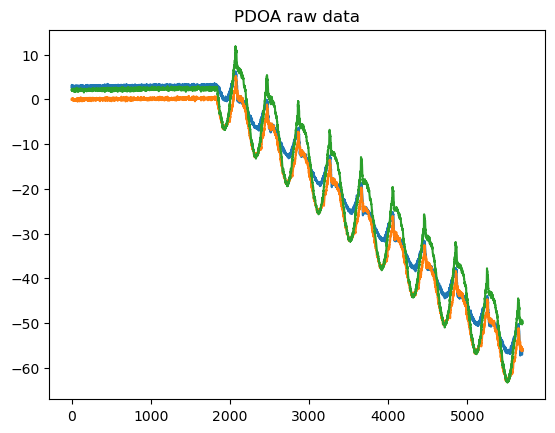

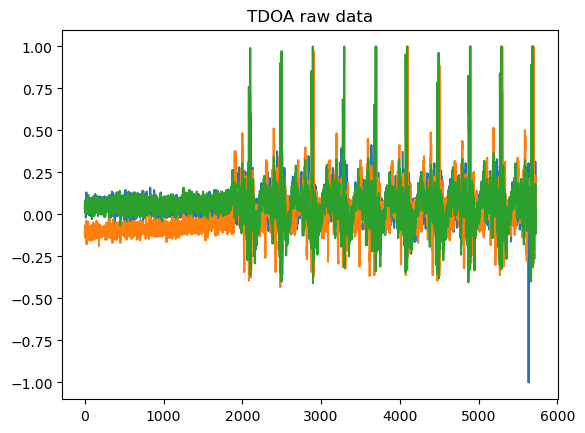

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.unwrap(np.angle(PDOA[np.all(np.isfinite(PDOA),1),1:]),axis=0))
plt.title("PDOA raw data")
plt.show()
plt.plot(TDOA[:,1:])
plt.title("TDOA raw data")
plt.show()

In [7]:
np.unwrap(np.angle(PDOA[:,1:]),axis=0).shape

(5726, 3)

In [3]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow
from PyQt5.QtCore import QTimer
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
 
class MplCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = plt.Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)
 
class ApplicationWindow(QMainWindow):
    def __init__(self):
        super(ApplicationWindow, self).__init__()
        self.initUI()
 
    def initUI(self):
        self.canvas = MplCanvas(self, width=5, height=4, dpi=100)
        self.setCentralWidget(self.canvas)
        self.canvas.axes.set_xlabel('Time')
        self.canvas.axes.set_ylabel('Value')
        self.canvas.axes.grid(True)
 
        self.timer = None
        self.xdata = []
        self.ydata = []
        self.ani = None
 
        self.create_timer()
        # self.create_animation()
 
    def create_timer(self):
        self.frame = 0
        self.timer = QTimer()
        self.timer.timeout.connect(self.update_data)
        self.timer.start(100)
        
        # self.timer = FuncAnimation(self.canvas.figure, self.update_data, interval=100)
 
    def create_animation(self):
        self.ani = FuncAnimation(self.canvas.figure, self.update_plot, frames=self.timer, interval=100)
 
    def update_data(self):
        # 生成模拟数据
        self.xdata.append(self.frame)
        self.xdata = self.xdata[-100: ]
        self.ydata.append(np.random.randint(0, 100))
        self.ydata = self.ydata[-100:]
        # self.canvas.axes.clear()
        self.canvas.axes.plot(self.xdata, self.ydata, 'r-')
        self.canvas.axes.set_xlim(left=self.xdata[0], right=max(self.xdata))
        # self.canvas.axes.set_ylim(bottom=0, top=100)
        self.canvas.axes.set_title('Real-time Plot')
        self.canvas.draw()
        self.frame += 1
 
    def update_plot(self, frame):
        # 更新图表
        self.canvas.axes.clear()
        self.canvas.axes.plot(self.xdata, self.ydata, 'r-')
        self.canvas.axes.set_xlim(left=0, right=max(self.xdata))
        self.canvas.axes.set_ylim(bottom=0, top=100)
        self.canvas.axes.set_title('Real-time Plot')
        self.canvas.draw()
 
def main():
    app = QApplication(sys.argv)
    mainWin = ApplicationWindow()
    mainWin.show()
    sys.exit(app.exec_())
 
if __name__ == '__main__':
    main()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15096\4084753063.py:55: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.canvas.axes.set_xlim(left=self.xdata[0], right=max(self.xdata))


SystemExit: 0

In [3]:
import pythoncom 
from win32com.client import gencache

typelib_path = 'D:\devlopment_software\PQKit_SDK\Sample\PQQTSample\RPC.tlb'  # 替换为你的.tlb文件路径
com_module = gencache.EnsureModule(typelib_path, 0, 1, 0)
pythoncom.CoInitializeEx(pythoncom.COINIT_APARTMENTTHREADED)



com_error: (-2147221005, '无效的类字符串', None, None)